In [2]:
import pandas as pd
from collections import Counter

In [4]:
import string

In [7]:
import nltk
from nltk.corpus import stopwords

In [9]:
import matplotlib.pyplot as plt

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
df = pd.read_csv('/Users/macbook/Desktop/Projects/Analytics/Brazilian ecommerce/review_text_by_score.csv')

In [16]:
df['full_review_text'] = df['full_review_text'].astype(str)

In [18]:
# Prepare stopwords and punctuation
stop_words = set(stopwords.words('portuguese') + stopwords.words('english'))
punct = set(string.punctuation)

In [20]:
# Function to clean and tokenize text
def clean_text(text):
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return [word for word in words if word not in stop_words and word.isalpha()]

In [22]:
# Group by review score and collect word frequencies
word_freq_by_score = {}

for score in sorted(df['review_score'].unique()):
    subset = df[df['review_score'] == score]
    words = []
    for review in subset['full_review_text']:
        words.extend(clean_text(review))
    word_freq_by_score[score] = Counter(words).most_common(10)  # Top 10 words


In [24]:
# Print results
for score, top_words in word_freq_by_score.items():
    print(f"\nReview Score: {score}")
    for word, count in top_words:
        print(f"  {word}: {count}")


Review Score: 1
  produto: 30
  recebi: 17
  veio: 11
  entregue: 10
  comprei: 8
  agora: 7
  chegou: 6
  entrega: 6
  ainda: 6
  resposta: 6

Review Score: 2
  produto: 11
  recebi: 6
  entregue: 5
  comprei: 5
  entrega: 3
  dia: 3
  chegou: 3
  nao: 3
  agora: 2
  data: 2

Review Score: 3
  produto: 15
  recebi: 8
  entrega: 8
  prazo: 5
  comprei: 4
  agora: 4
  caixa: 4
  loja: 3
  enviaram: 3
  ainda: 3

Review Score: 4
  produto: 15
  recomendo: 9
  bom: 8
  prazo: 7
  chegou: 6
  loja: 6
  entrega: 5
  compra: 5
  dentro: 4
  aparelho: 3

Review Score: 5
  produto: 59
  prazo: 36
  recomendo: 34
  antes: 30
  entrega: 30
  super: 22
  bem: 19
  bom: 19
  chegou: 16
  qualidade: 15


In [26]:
# Convert to list of dictionaries for DataFrame
export_rows = []

for score, top_words in word_freq_by_score.items():
    for word, count in top_words:
        export_rows.append({
            'review_score': score,
            'word': word,
            'count': count
        })

In [28]:
# Create DataFrame
df_export = pd.DataFrame(export_rows)

In [30]:
# Export to CSV
df_export.to_csv('review_word_frequency_by_score.csv', index=False)

print("Exported to review_word_frequency_by_score.csv")

Exported to review_word_frequency_by_score.csv


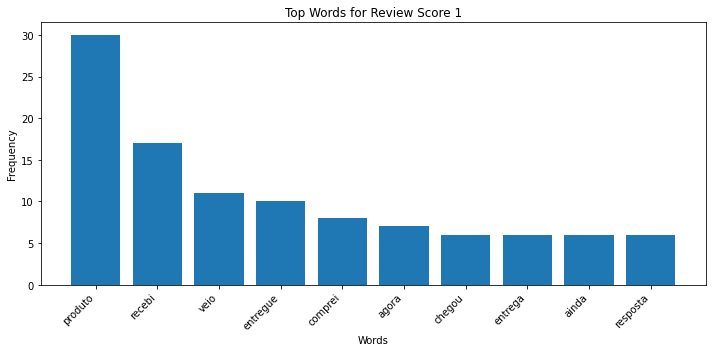

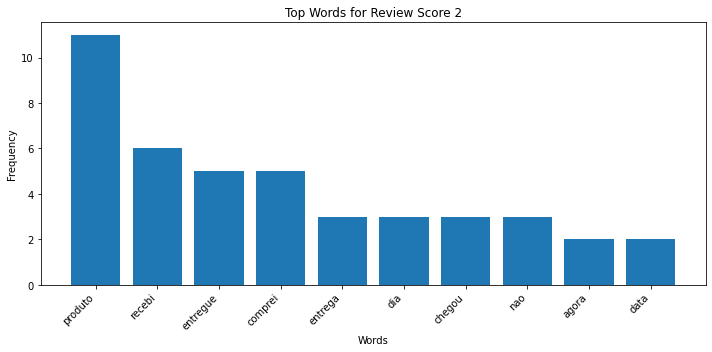

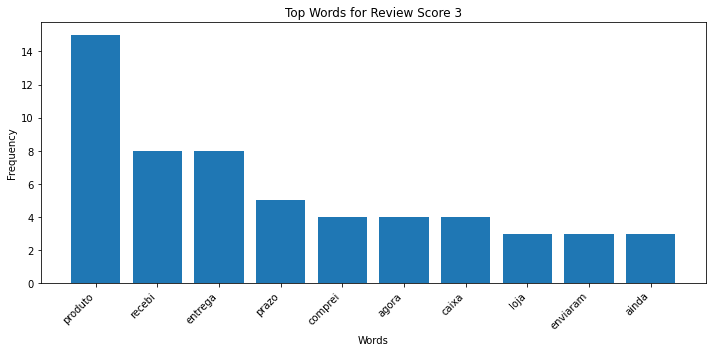

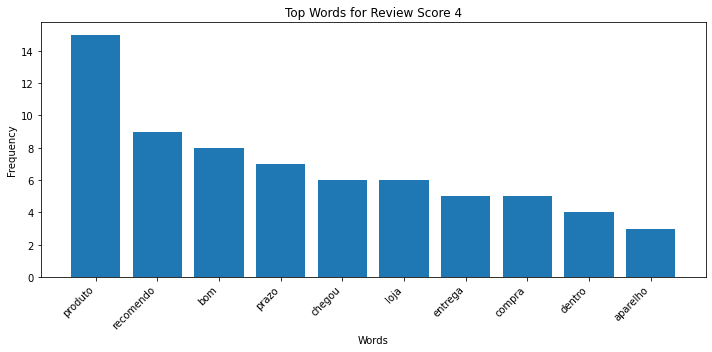

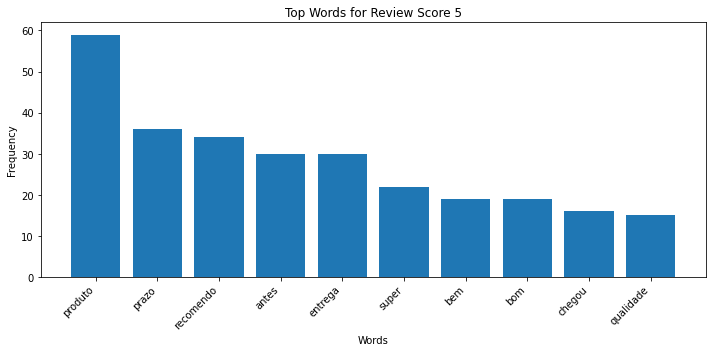

In [31]:
import matplotlib.pyplot as plt

# Assuming word_freq_by_score is a dictionary like:
# {
#   1: [('produto', 30), ('recebi', 17), ...],
#   2: [('produto', 11), ...],
#   ...
# }

# Loop through each score and generate a bar chart
for score, word_counts in word_freq_by_score.items():
    # Separate words and counts
    words, counts = zip(*word_counts)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f"Top Words for Review Score {score}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()